In [ ]:
# Imports
# can we regress back to ratios instead? how?

In [1]:
import numpy as np
import pandas as pd
import os
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import seaborn as sns
sns.set(style='whitegrid')

import itertools as it

from os.path import join as pjoin

%config InteractiveShell.ast_node_interactivity='last'
%config InlineBackend.figure_format = 'svg'

In [2]:
pd.set_option('max_rows', 96)
pd.set_option('max_columns', 96)

# Predicted Values DataFrame

In [3]:
#mdf = pd.read_csv('predicted_values_of_different_regression.csv', index_col=0)
path = '../data_o/calibration/single_species_calibration/predicted_fractions'

a680_720_slr_mlr = 'a680_720_slr_mlr_predicted_fractions.csv'
a680_720 = 'a680_720_slr_predicted_fractions.csv'
a680_a750 = 'a680_a750_slr_predicted_fractions.csv'

mdf = pd.read_csv(pjoin(path, a680_a750), index_col=0)


In [4]:
mdf.head()

row  col  B_lbl  C_lbl    F680    A680    A750     320     325     330  \
well                                                                          
A1     A    1  0.200   0.25  4666.0  0.7210  0.4146  0.8399  0.8359  0.8349   
B1     B    1  0.175   0.25  4832.0  0.7822  0.4155  0.8916  0.8890  0.8907   
C1     C    1  0.150   0.25  4638.0  0.6925  0.3829  0.7923  0.7897  0.7912   
D1     D    1  0.125   0.25  4775.0  0.6981  0.3593  0.7690  0.7657  0.7669   
E1     E    1  0.100   0.25  4936.0  0.6788  0.3414  0.7440  0.7413  0.7438   

         335     340     345     350     355     360     365     370     375  \
well                                                                           
A1    0.8356  0.8319  0.8219  0.8098  0.7991  0.7940  0.7921  0.7931  0.7970   
B1    0.8935  0.8921  0.8813  0.8673  0.8559  0.8513  0.8514  0.8556  0.8618   
C1    0.7943  0.7931  0.7841  0.7722  0.7624  0.7583  0.7583  0.7614  0.7671   
D1    0.7695  0.7676  0.7580  0.7454  0.7354  0.7312  0.7311  0.7343  0.7401   
E1    0.7480  0.7473  0.7380  0.7258  0.7160  0.7121  0.7124  0.7169  0.7241   

         380     385     390     395     400     405     410     415     420  \
well                                                                           
A1    0.8007  0.8023  0.8010  0.8004  0.8059  0.8164  0.8355  0.8502  0.8596   
B1    0.8683  0.8717  0.8706  0.8713  0.8793  0.8940  0.9204  0.9407  0.9537   
C1    0.7722  0.7746  0.7737  0.7736  0.7797  0.7914  0.8125  0.8289  0.8394   
D1    0.7457  0.7488  0.7476  0.7478  0.7548  0.7680  0.7915  0.8103  0.8223   
E1    0.7301  0.7338  0.7332  0.7336  0.7415  0.7558  0.7810  0.8011  0.8145   

         425     430     435     440     445     450     455     460     465  \
well                                                                           
A1    0.8666  0.8766  0.8857  0.8865  0.8728  0.8529  0.8358  0.8199  0.8177   
B1    0.9637  0.9780  0.9914  0.9935  0.9763  0.9508  0.9294  0.9094  0.9070   
C1    0.8471  0.8584  0.8690  0.8705  0.8559  0.8349  0.8168  0.8001  0.7977   
D1    0.8311  0.8442  0.8566  0.8591  0.8444  0.8221  0.8028  0.7852  0.7830   
E1    0.8243  0.8385  0.8527  0.8564  0.8414  0.8178  0.7977  0.7796  0.7772   

         470     475     480     485     490     495     500     505     510  \
well                                                                           
A1    0.8198  0.8235  0.8235  0.8154  0.7983  0.7728  0.7401  0.7025  0.6662   
B1    0.9110  0.9168  0.9171  0.9072  0.8846  0.8513  0.8089  0.7602  0.7140   
C1    0.8006  0.8051  0.8053  0.7967  0.7780  0.7509  0.7159  0.6760  0.6379   
D1    0.7869  0.7924  0.7926  0.7854  0.7642  0.7347  0.6973  0.6539  0.6125   
E1    0.7817  0.7879  0.7897  0.7807  0.7595  0.7289  0.6892  0.6439  0.6006   

         515     520  ...    B_p685    C_p685    B_p690    C_p690    B_p695  \
well                  ...                                                     
A1    0.6329  0.6063  ...  0.194705  0.464002  0.193887  0.408316  0.192820   
B1    0.6716  0.6381  ...  0.141916  0.566768  0.141330  0.498748  0.140557   
C1    0.6028  0.5769  ...  0.156059  0.473960  0.155408  0.417079  0.154555   
D1    0.5746  0.5443  ...  0.103358  0.527134  0.102937  0.463871  0.102377   
E1    0.5612  0.5297  ...  0.084397  0.527285  0.084058  0.464004  0.083603   

        C_p695    B_p700    C_p700    B_p705    C_p705    B_p710    C_p710  \
well                                                                         
A1    0.331053  0.191838  0.295672  0.191128  0.271778  0.190340  0.253590   
B1    0.404372  0.139797  0.361155  0.139262  0.331970  0.138668  0.309753   
C1    0.338157  0.153748  0.302017  0.153171  0.277611  0.152531  0.259032   
D1    0.376095  0.101801  0.335899  0.101402  0.308756  0.100960  0.288091   
E1    0.376202  0.083113  0.335995  0.082780  0.308844  0.082411  0.288173   

        B_p715    C_p715    B_p720    C_p720    B_p725    C_p725    B_p730  \
well                        

# Plotting Function

In [5]:
def get_96position(tdf, column='440'):
    """Returns the values of wanted column (lamda) as a DataFrame
    resembling its 96well plate layout. Facilitates comparison"""
    ninsix = pd.DataFrame()
    for l in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
        c = tdf[tdf.index.str.contains(l)][column].values
        ninsix[l] = c
    ninsix = ninsix.transpose()
    ninsix.columns = ninsix.columns+1

    return ninsix

In [6]:
def get_series(tdf, column='440'):
    """Returns a specific column as a Pandas Series"""
    
    return tdf[column]

In [7]:
def plot_relationship(tdf, column='440', ml_model=False):

    """Given a wavelength of interest this function displays a
    plot of the sum of the predicted values vs the values at
    that wavelength"""
    
    s1 = get_series(tdf, column)
    
    if ml_model:
        sm = get_series(tdf, 'B_pML_'+column) + get_series(tdf, 'C_pML_'+column)
    else:
        sm = get_series(tdf, 'B_p'+column) + get_series(tdf, 'C_p'+column)
    
    sns.regplot(x=s1, y=sm)
    plt.show()
    plt.close()
    
    

In [8]:
def set_B_and_C(df, column):
    
    """This helper function sets the concentraiton values B and
    C so that plotting function can plot the right values"""
    
    df = df.copy()
    
    rows = df['row'].unique()
    cols =  df['col'].unique()
    
    for row in rows:
        value = df.loc[(df['row']==row) & (df['col']==12), column][0]
        df.loc[df['row']==row, 'B'] = value

    for col in cols:
        value = df.loc[(df['row']=='H') & (df['col']==col), column][0]
        df.loc[df['col']==col, 'C'] = value
        
    return df

In [9]:
def plot_pred_vs_known(mdf, column='440', ml_model=False):
    
    """This function takes in the previously calculated prediction values and
    outputs the the predicted vs known values for [chlamy] and [bacter], 
    column refers to the variable wavelength used to construct the regression
    that gave rise to the predicted values"""
    
    df = mdf.copy()

    df = set_B_and_C(df, column)
    #print(df)
    # figsize
    fs = (8, 10)
    # alpha value for plot markers (see-throughness)
    a = 0.65
    # bacter figure
    fig0 = plt.figure(figsize=fs)
    gs = gridspec.GridSpec(2,1)
    axes = []
    for r in [0,1]:
        for c in [0]:
            axes.append(fig0.add_subplot(gs[r,c]))

    
    # get predicted values from column named
    if ml_model:
        Bp = 'B_pML_'+column
    else:
        Bp = 'B_p'+column
        print(Bp)
        
    if ml_model:
        Cp = 'C_pML_'+column
    else:
        Cp = 'C_p'+column
        
    # set the scale maximum of the plot to be the maximum value of the maximum
    # of the predicted and known values, which -ever is greater
    #print(df['B'].max(), df['C'].max())
    smx = max(df[Bp].max(), df['B'].max(), df[Cp].max(), df['C'].max())
    #print(smx)
    smx = smx+.1*smx
    
    sns.scatterplot(x='B', y=Bp, data=df, hue='row',
                    palette=sns.color_palette("YlOrRd_r", 8),
                    edgecolor='black', alpha=a, ax=axes[0])
    
    handles, labels = axes[0].get_legend_handles_labels()
    axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient',
                  loc=2, prop={'size':7})
    axes[0].set_title('Predicted vs. Actual [B]')
    axes[0].set_ylabel('$\hat{[B]}$$_{pred}$')
    axes[0].set_xlabel('$[B]_{known}$')

    axes[0].plot((0,1), 'r--',)
    axes[0].set_xlim(left=-0.02, right=smx) 
    axes[0].set_ylim(bottom=-0.1, top=smx)


    sns.scatterplot(x='B', y=Bp, data=df, hue='col',
                    palette=sns.color_palette("YlGn_r", 12),
                    edgecolor='black', alpha=a, ax=axes[1])

    handles, labels = axes[1].get_legend_handles_labels()
    axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient',
                   loc=2, prop={'size':7})
    axes[1].set_title('Predicted vs. Actual [B]')
    axes[1].set_ylabel('$\hat{[B]}$$_{pred}$')
    axes[1].set_xlabel('$[B]_{known}$')

    axes[1].plot((0,1), 'r--',)
    axes[1].set_xlim(left=-0.02, right=smx)
    axes[1].set_ylim(bottom=-0.1, top=smx)

    if ml_model:
        fig0.suptitle("[Bacteria] Predictions Using ML Multiple Linear Regression @"+column, y=.95)
    else:
        fig0.suptitle("[Bacteria] Predictions Using Simple Linear Regression Models @"+column, y=.95)
        
    fig0.subplots_adjust(hspace=.3)
    
    #plt.show()
    #plt.close()



    # CHLAMY
    fig1=plt.figure(figsize=fs)
    gs = gridspec.GridSpec(2,1)
    axes = []
    for r in [0,1]:
        for c in [0]:
            axes.append(fig1.add_subplot(gs[r,c]))

        
    # set the scale maximum of the plot to be the maximum value of the maximum
    # of the predicted and known values, which -ever is greater
    smx = max(df[Cp].max(), df['C'].max(), df[Bp].max(), df['B'].max())
    smx = smx+.1*smx
    
    
    
    sns.scatterplot(x='C', y=Cp, data=df, hue='row',
                    palette=sns.color_palette("YlOrRd_r", 8),
                    edgecolor='black', alpha=a,ax=axes[0])


    handles, labels = axes[0].get_legend_handles_labels()
    axes[0].legend(handles[::-1], labels[:-9:-1], title='[B] gradient',
                  loc=2, prop={'size':7})
    axes[0].set_title('Predicted vs. Actual [C]')
    axes[0].set_ylabel('$\hat{[C]}$$_{pred}$')
    axes[0].set_xlabel('$[C]_{known}$')

    axes[0].plot((0,1), 'r--',)
    axes[0].set_xlim(left=-0.02, right=smx)
    axes[0].set_ylim(bottom=-0.1, top=smx)


    sns.scatterplot(x='C', y=Cp, data=df, hue='col',
                    palette=sns.color_palette("YlGn_r", 12),
                    edgecolor='black', alpha=a, ax=axes[1])

    handles, labels = axes[1].get_legend_handles_labels()
    axes[1].legend(handles[::-1], labels[:-13:-1], title='[C] gradient',
                  prop={'size':7}, loc=2)
    axes[1].set_title('Predicted vs. Actual [C]')
    axes[1].set_ylabel('$\hat{[C]}$$_{pred}$')
    axes[1].set_xlabel('$[C]_{known}$')

    axes[1].plot((0,1), 'r--',)
    axes[1].set_xlim(left=-0.02 ,right=smx)
    axes[1].set_ylim(bottom=-0.1, top=smx)
    
    if ml_model:
        fig1.suptitle("[Chlamy] Predictions Using ML Multiple Linear Regression @"+column, y=.95)
    else:
        fig1.suptitle("Model's Predicted vs Known ["+column+'] Concentrations', y=.95)
    
    fig1.subplots_adjust(hspace=.3)

    plt.show()
    plt.close()
    


# Plot All Wavelengths

In [10]:
#lambdas = mdf.columns.values[7:104:5]
#for col in lambdas:
#    print(col)
#    plot_pred_v_known(mdf, col)

# [B], [C] _560_

B_p560


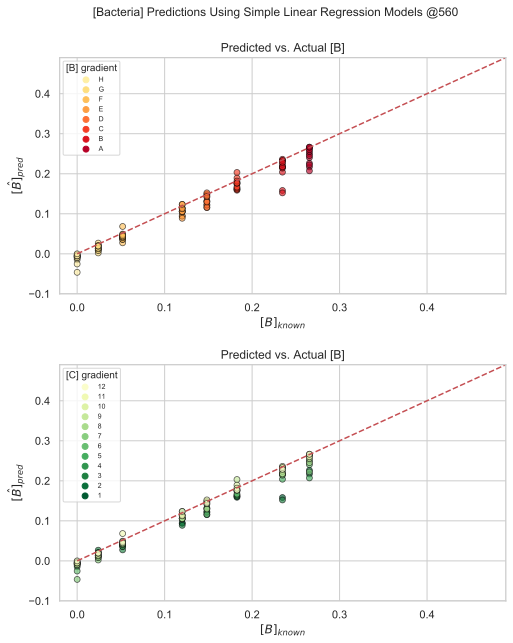

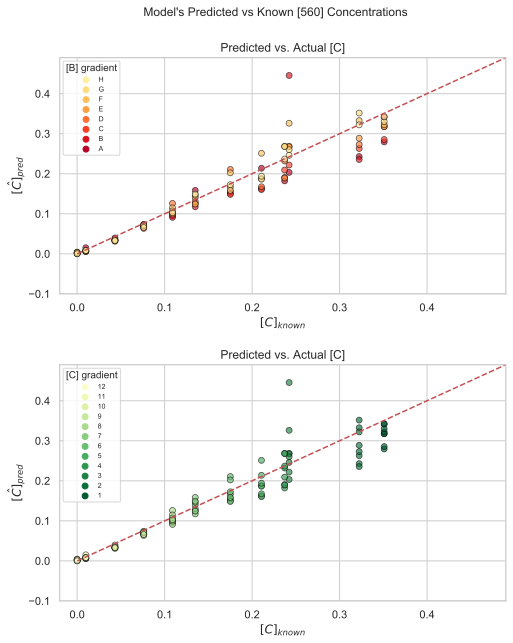

In [11]:
plot_pred_vs_known(mdf, '560')

# [B], [C] _440_


B_p800


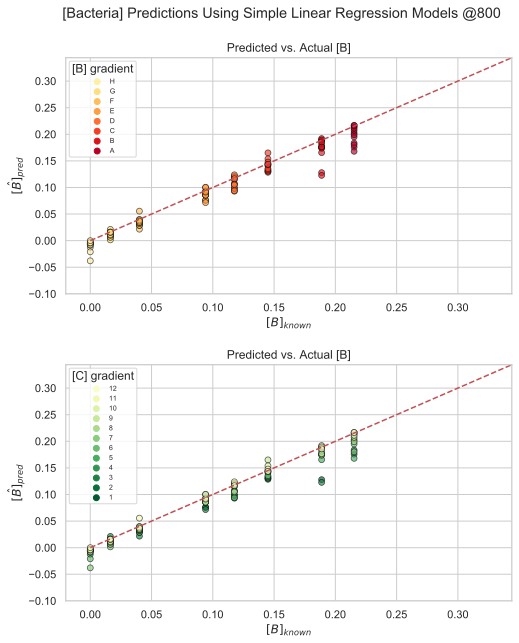

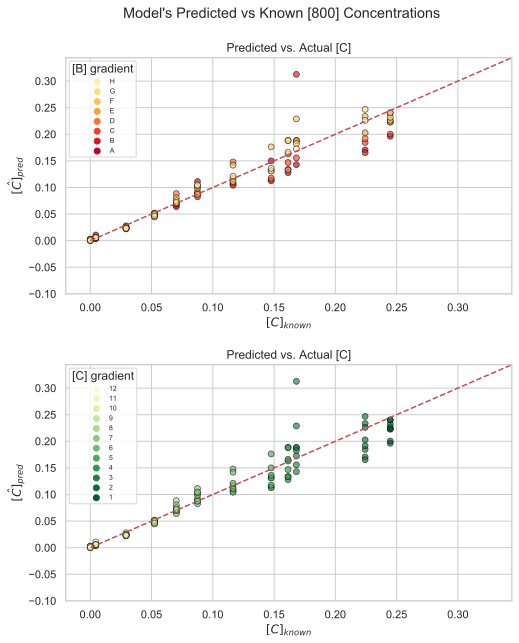

In [107]:
plot_pred_vs_known(mdf, '800')

# [B], [C] _480_

B_p480


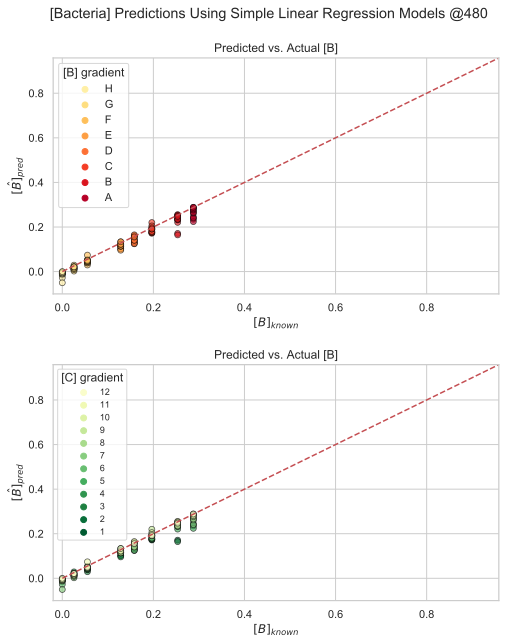

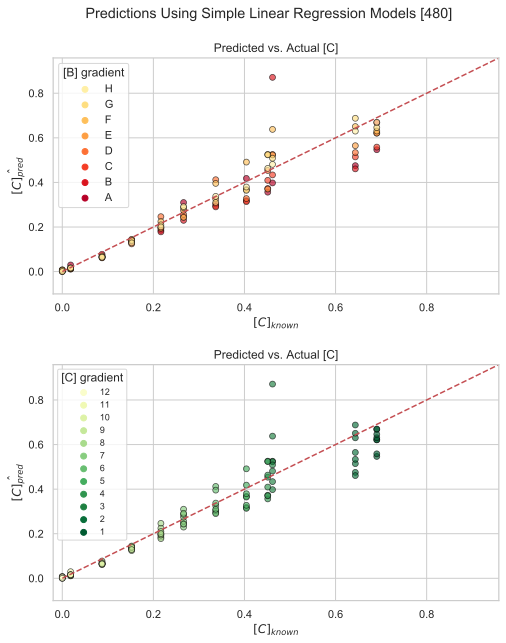

In [85]:
plot_pred_vs_known(mdf, '480')

In [86]:
b56=get_96position(mdf,column='B_p560')

In [87]:
c56=get_96position(mdf,column='C_p560')

# [B], [C] _600_

B_p600


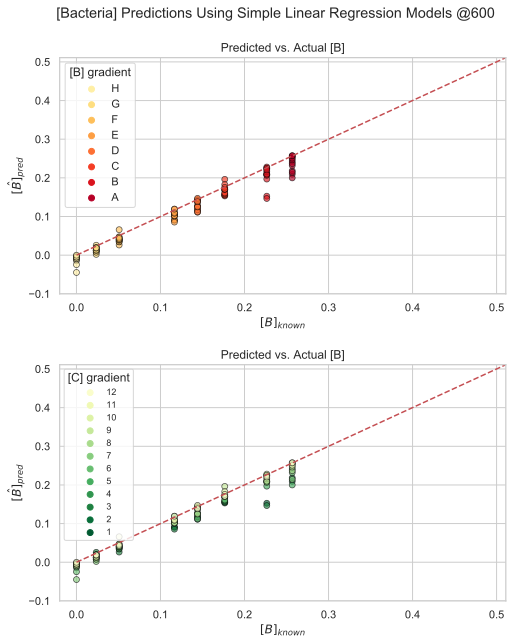

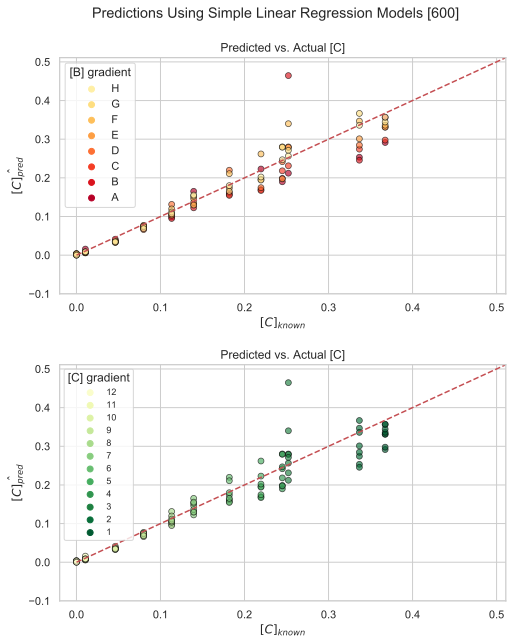

In [88]:
plot_pred_vs_known(mdf, '600')
#plot_pred_vs_known(mdf, '600', ml_model=True)


# HOW COME THIS 600 doesn't behave like the SC 600?!

# [B], [C] _680_

B_p680


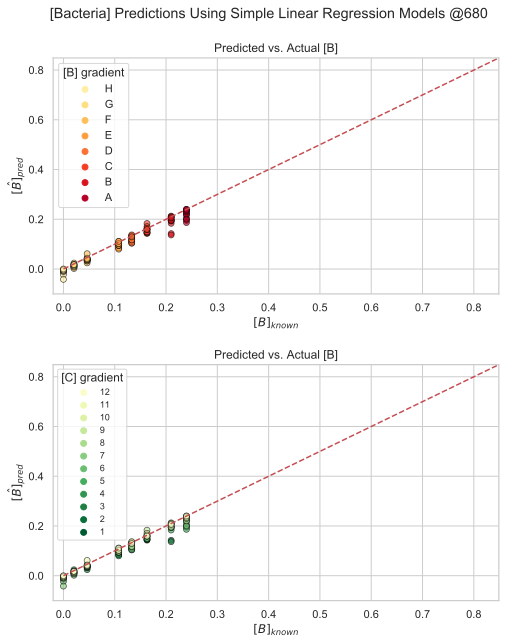

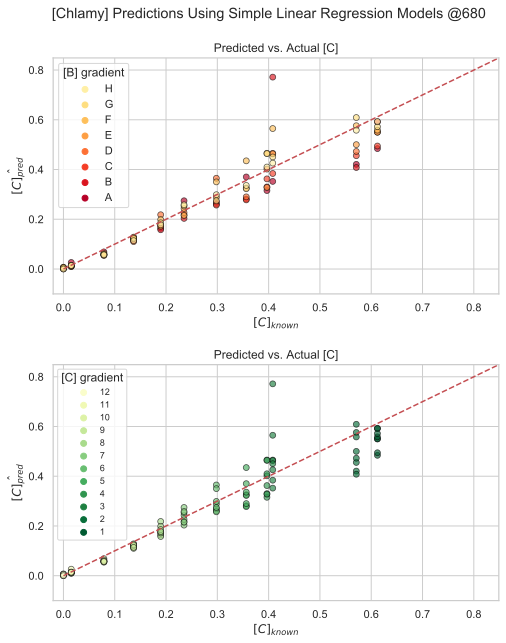

In [81]:
plot_pred_vs_known(mdf, '680')
#plot_pred_vs_known(mdf, '680', True)

# [B], [C] _720_

B_p720


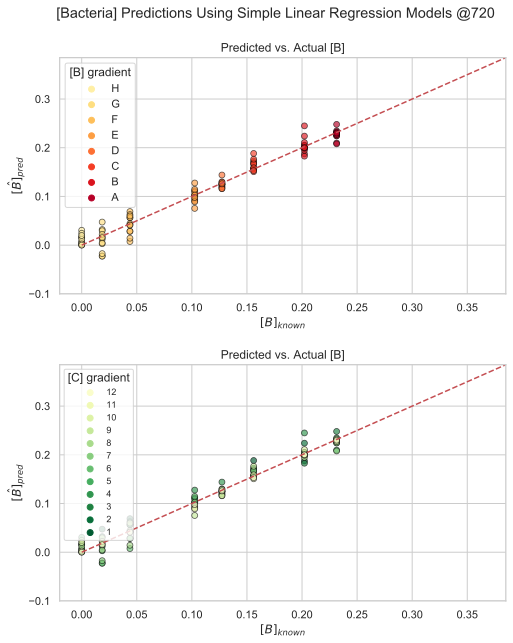

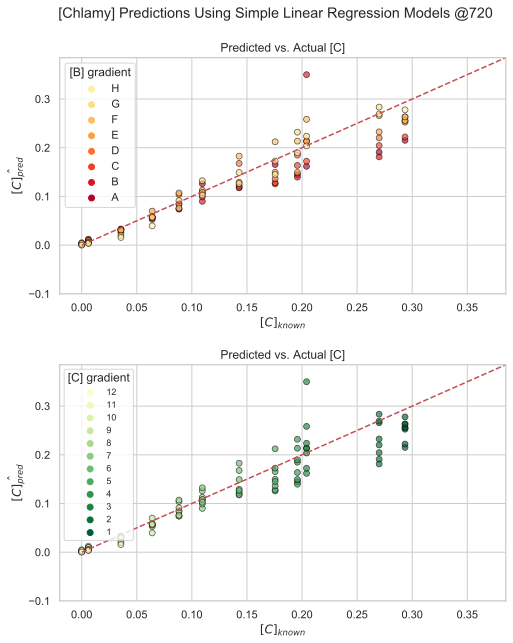

In [67]:
plot_pred_vs_known(mdf, '720')
#plot_pred_vs_known(mdf, '720', True)

# [B], [C] _750_

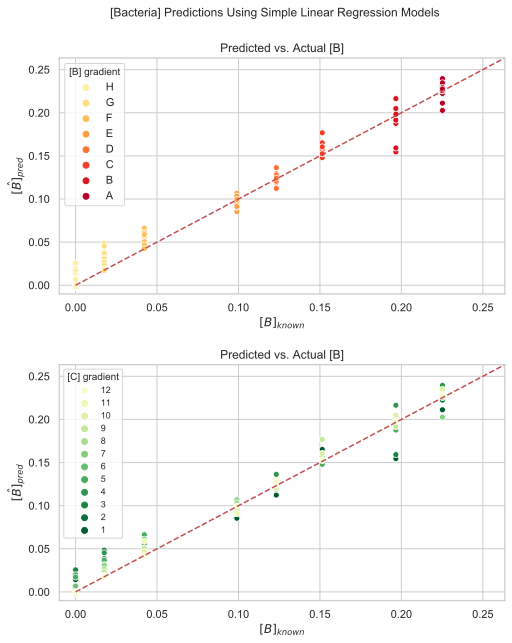

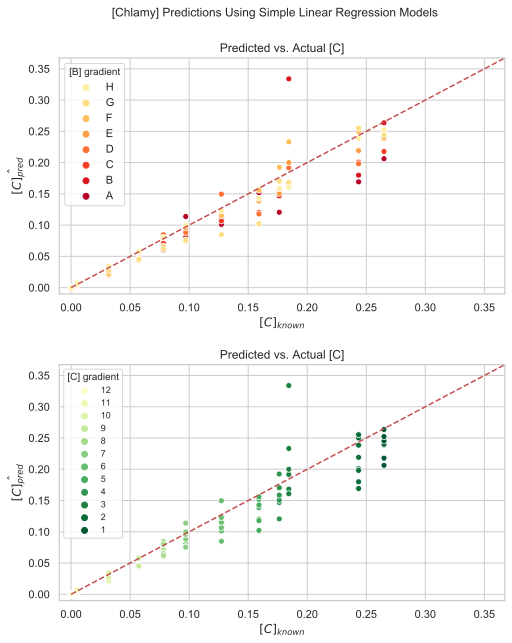

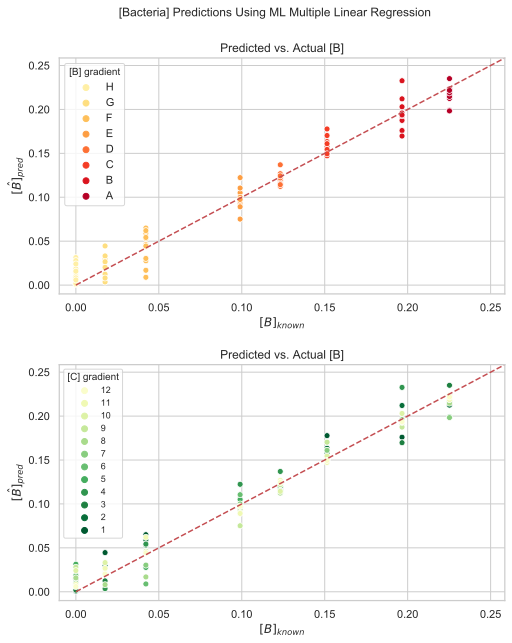

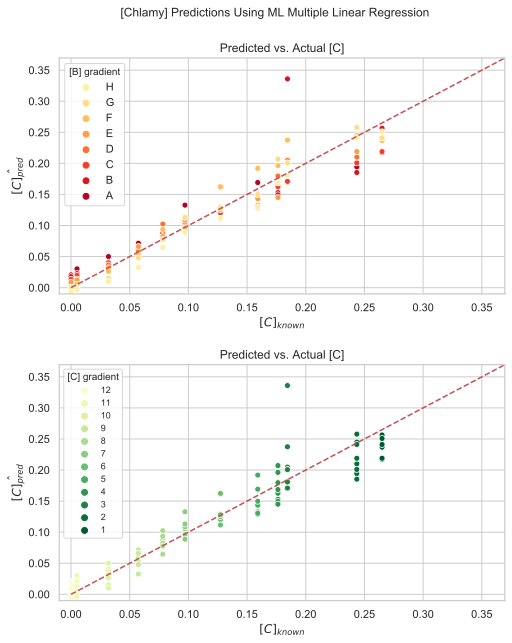

In [26]:
plot_pred_vs_known(mdf, '750')
plot_pred_vs_known(mdf, '750', True)

# [B], [C] _800_

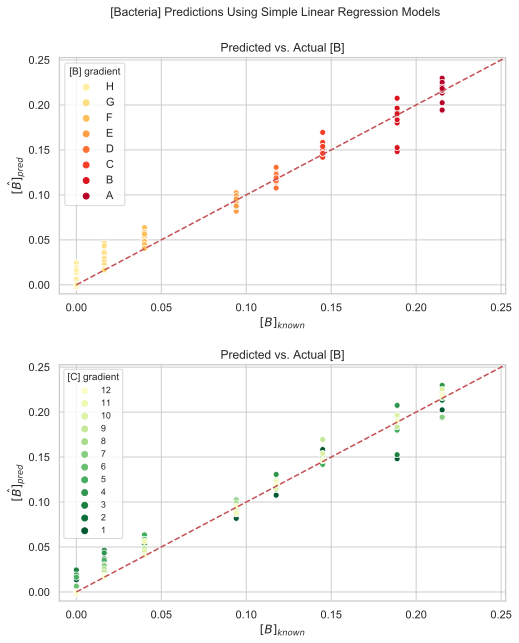

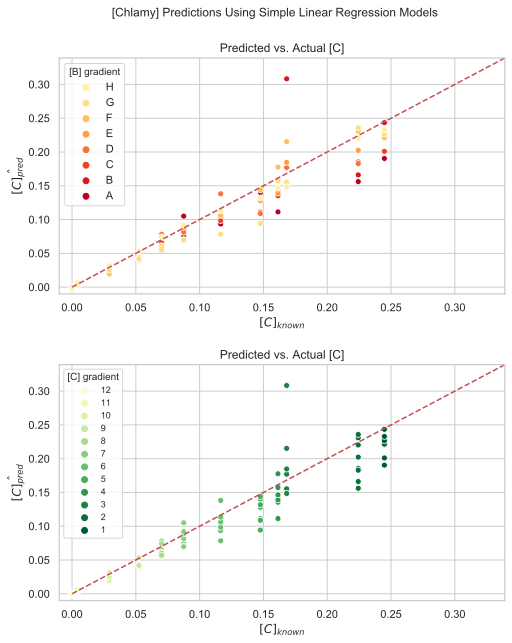

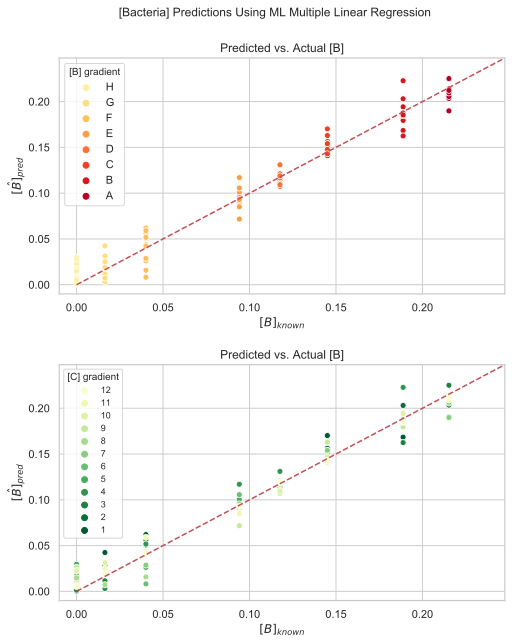

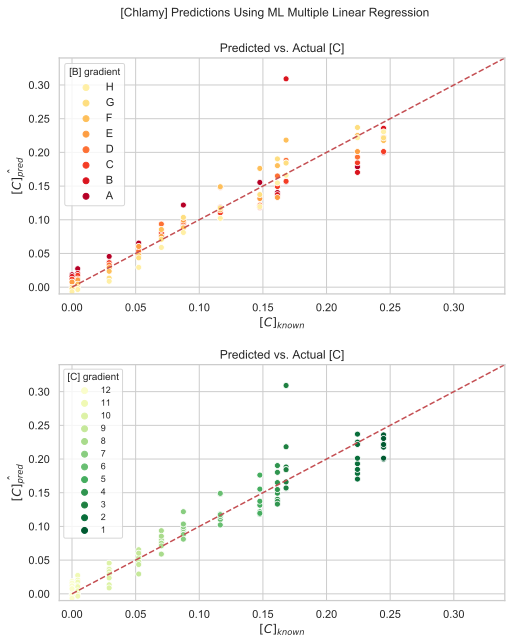

In [27]:
plot_pred_vs_known(mdf, '800')
plot_pred_vs_known(mdf, '800', True)

# Plot Sums of Predictions Vs Well Value

In [30]:
lambdas =['440', '480', '500', '515',
         '560', '600', '635', '680',
         '720','750', '800']

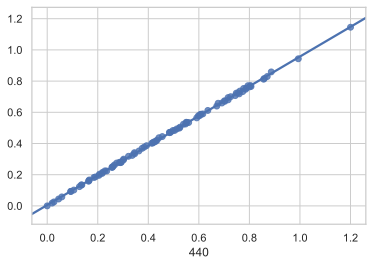

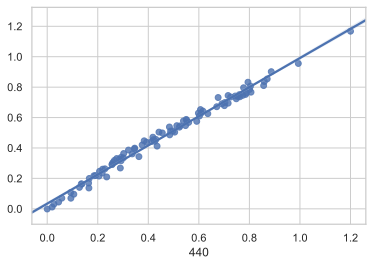

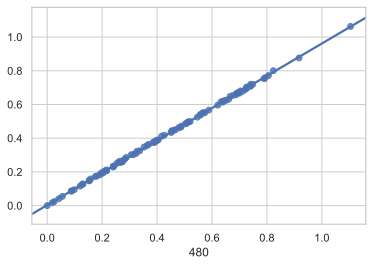

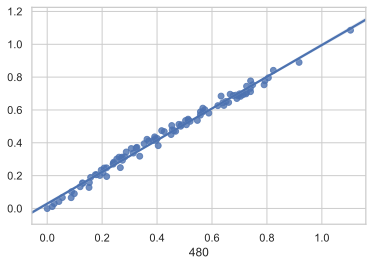

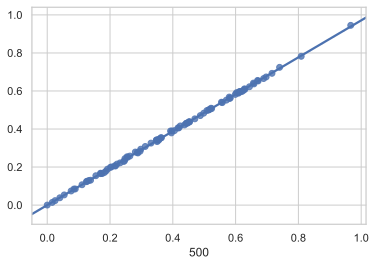

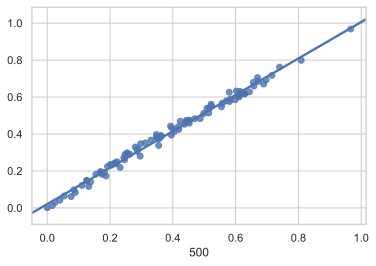

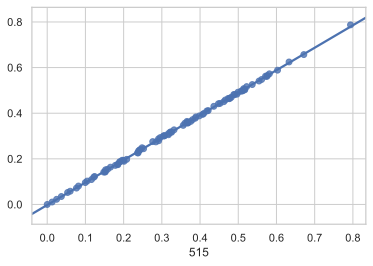

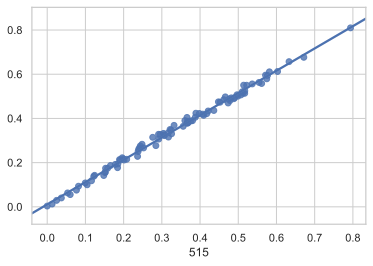

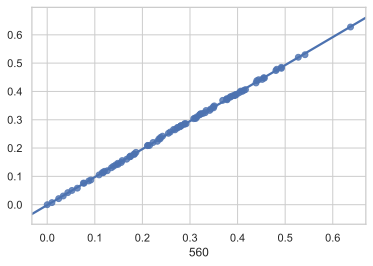

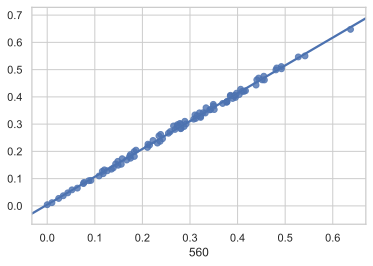

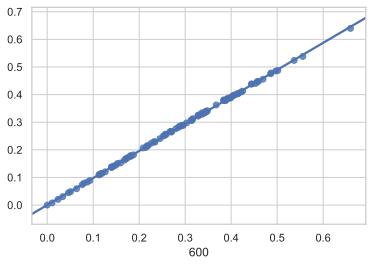

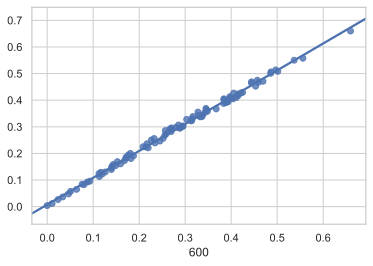

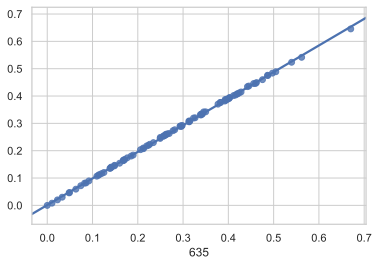

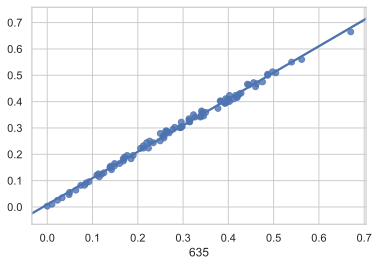

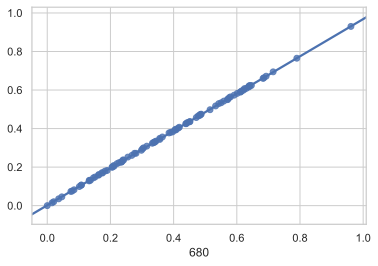

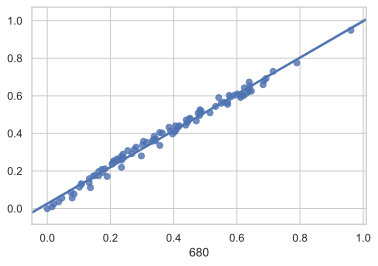

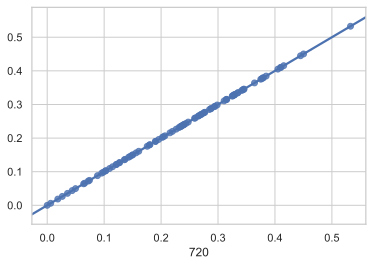

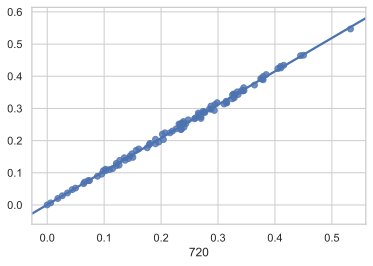

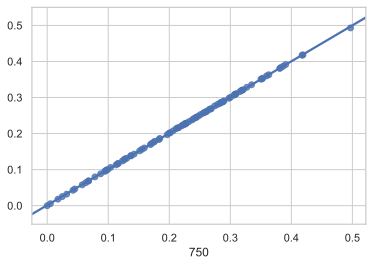

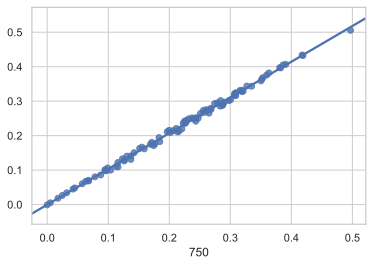

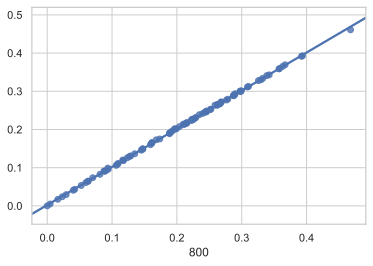

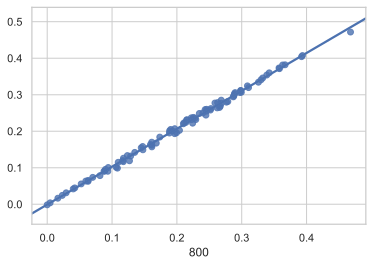

In [34]:
for col in lambdas:
    plot_relationship(mdf, col)
    plot_relationship(mdf, col, True)    